In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns

%matplotlib inline

### Загрузить файл hr.csv.

In [2]:
df = pd.read_csv("hr.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [4]:
df.mode().T

,0,1
satisfaction_level,0.1,NaN
last_evaluation,0.55,NaN
number_project,4,NaN
average_montly_hours,135,156
time_spend_company,3,NaN
Work_accident,0,NaN
left,0,NaN
promotion_last_5years,0,NaN
sales,sales,NaN
salary,low,NaN


In [5]:
numeric_vals = ([
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_montly_hours",
    "time_spend_company",
    "Work_accident",
    "left",
    "promotion_last_5years"
    ])
df_numeric = df[numeric_vals]

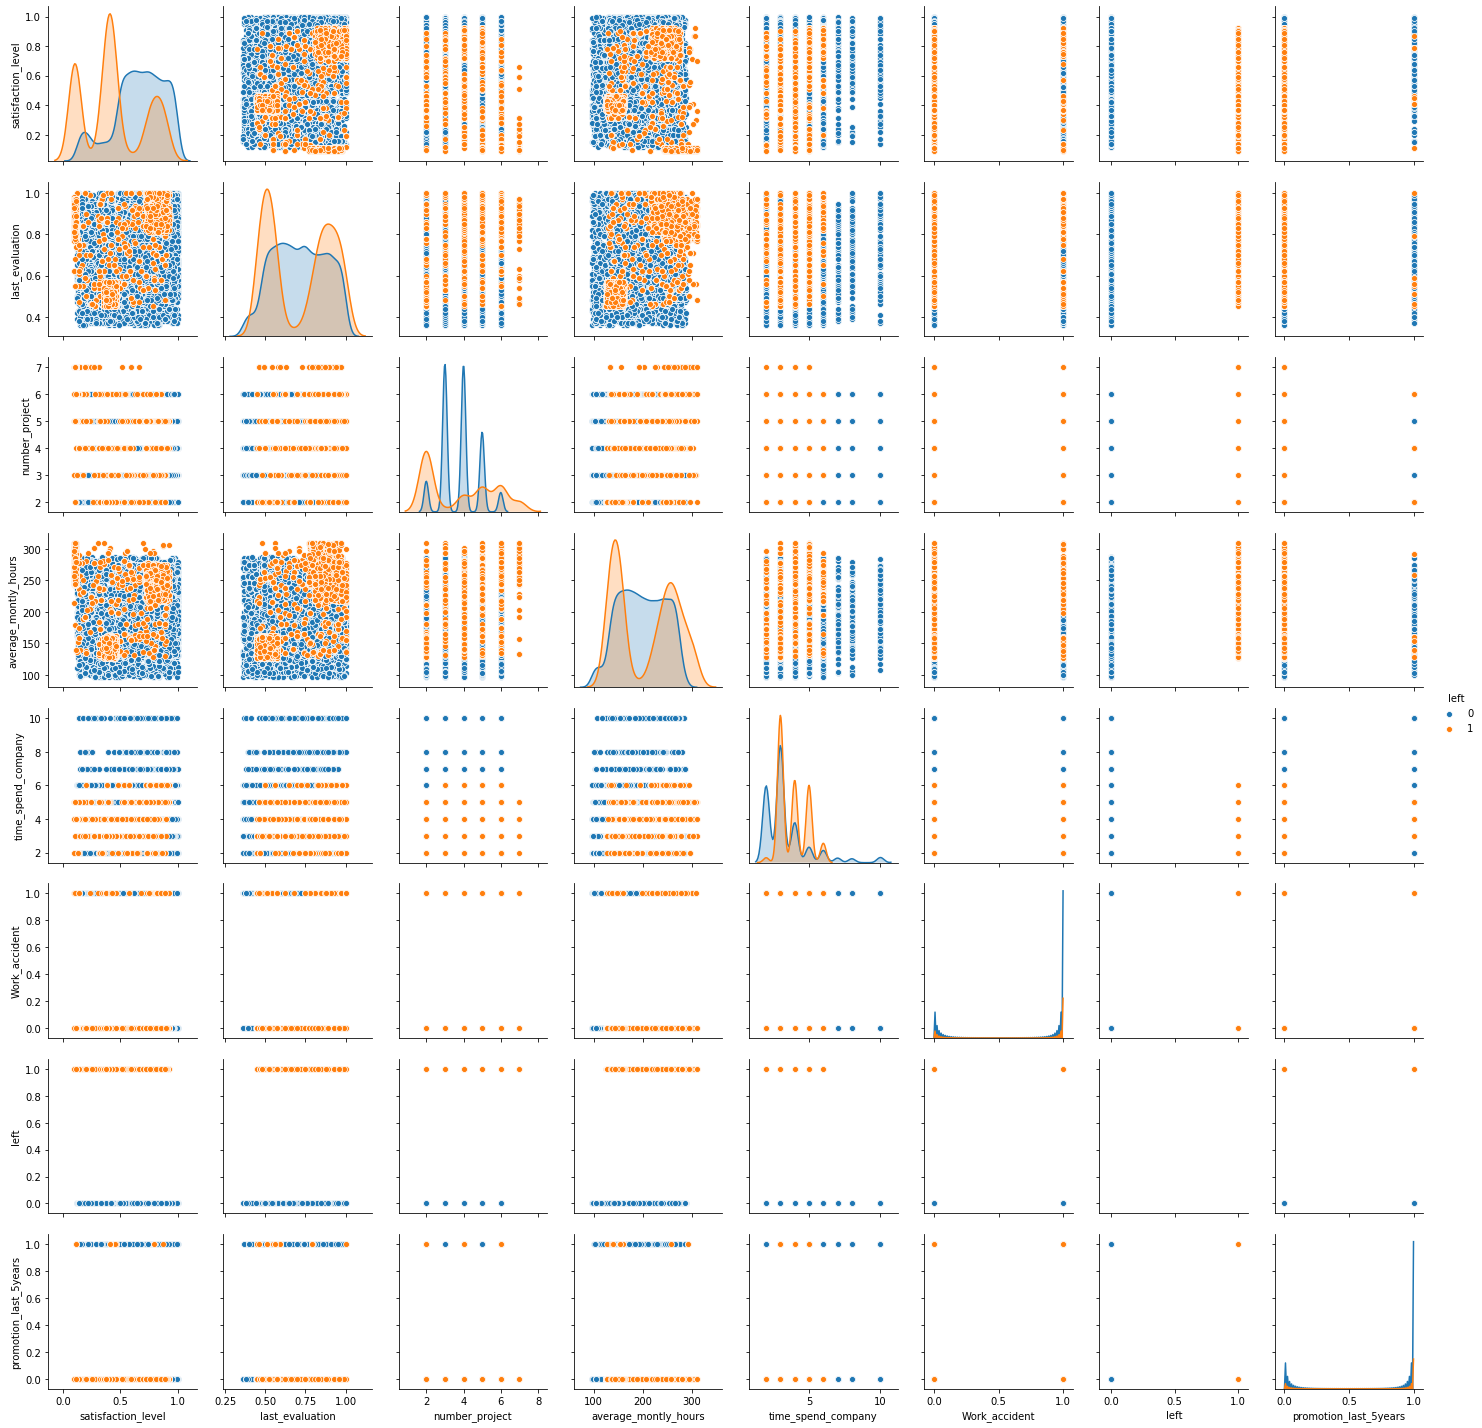

In [129]:
sns.pairplot(df, hue="left")
plt.show()

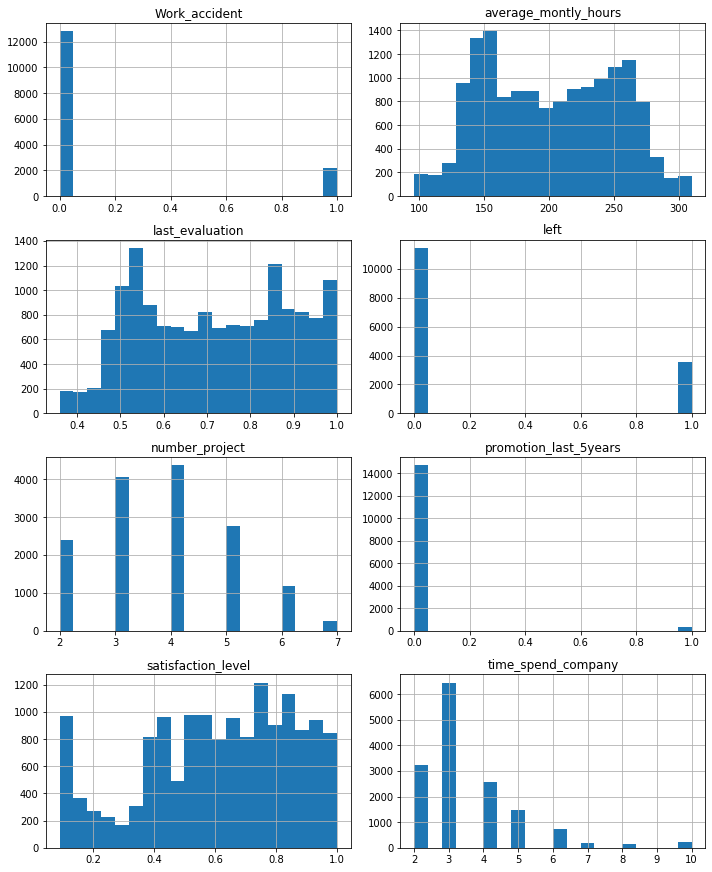

In [6]:
df.select_dtypes('number').hist(layout=(5,2), figsize=(10,15), bins=20)
plt.tight_layout()

### Рассчитать и визуализировать корреляционную матрицу для переменных.

In [7]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


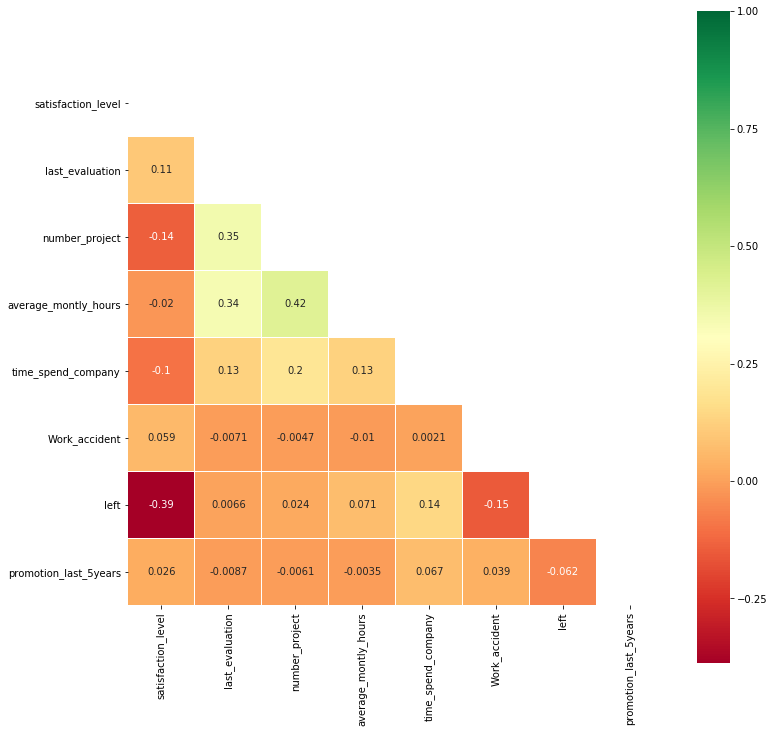

In [8]:
plt.figure(figsize = (12,12))

corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, square=True)
plt.show()

In [9]:
sorted_corr = corr                              \
                .mask(mask)                     \
                .mask(abs(corr)<=0.2)           \
                .unstack()                      \
                .sort_values()                  \
                .sort_values(ascending = False) \
                .dropna()
print("Самые сильные корреляции")
for key, value in sorted_corr.items():
    param1 = "|" + key[0].replace('\n',' ') + "|" 
    param2 = "|" + key[1].replace('\n',' ') + "|" 
    print(f"{param1} to {param2}: {value:1.3f}")
print() 

Самые сильные корреляции
|number_project| to |average_montly_hours|: 0.417
|last_evaluation| to |number_project|: 0.349
|last_evaluation| to |average_montly_hours|: 0.340
|satisfaction_level| to |left|: -0.388



### Визуализировать несколько взаимосвязей между переменными.

In [10]:
for column_name in df.columns:
    print(f'"{column_name}"')

"satisfaction_level"
"last_evaluation"
"number_project"
"average_montly_hours"
"time_spend_company"
"Work_accident"
"left"
"promotion_last_5years"
"sales"
"salary"


In [128]:
bins = 5
df["satisfaction_group"] = pd.cut(x=df.satisfaction_level,bins=bins,labels=range(bins))
satisfaction_salary = (
                        pd.pivot_table(
                                df, 
                                columns=["left"], 
                                index="satisfaction_group", 
                                values="time_spend_company",
                                aggfunc="count",
                                fill_value=0
                            )
                        )
satisfaction_salary

left,0,1
satisfaction_group,,
0,892,941
1,733,1522
2,3097,149
3,3422,461
4,3284,498


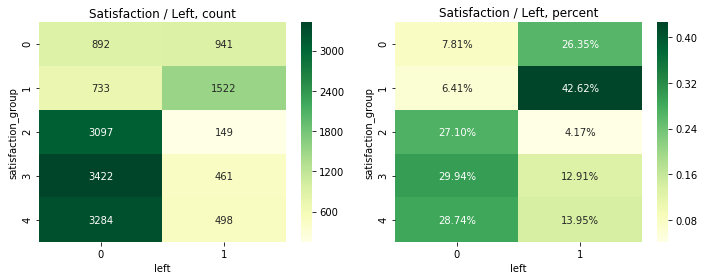

In [140]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax = axes.flatten()

sns.heatmap(satisfaction_salary, annot=True, fmt="1.0f", ax=ax[0], cmap="YlGn")
sns.heatmap(satisfaction_salary.apply(lambda x:x/sum(x), axis=0), annot=True, fmt="0.2%", cmap="YlGn", ax=ax[1])
ax[0].set_title("Satisfaction / Left, count")
ax[1].set_title("Satisfaction / Left, percent")
plt.tight_layout()

Text(0.5, 1, 'Project count per salary lvl')

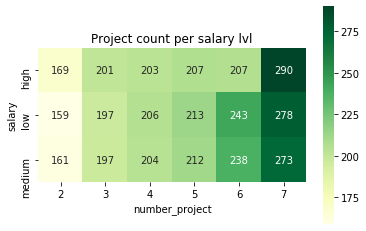

In [146]:
salary_projects_avg_mon = pd.pivot_table(
                                df, 
                                index="salary", 
                                columns="number_project", 
                                values= "average_montly_hours"
                            )
# salary_projects_avg_mon
sns.heatmap(salary_projects_avg_mon, square=True, annot=True, fmt="1.0f", cmap="YlGn")
plt.title("Project count per salary lvl")

In [13]:
df["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

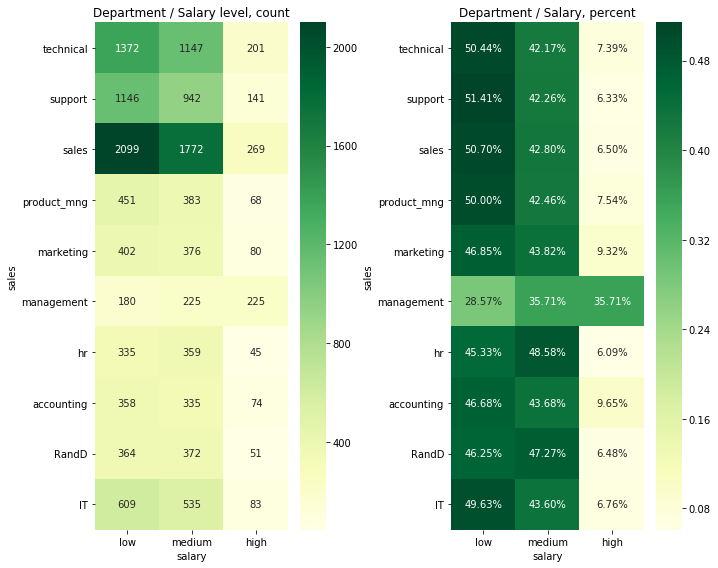

In [151]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
ax = axes.flatten()

sorted_pivot = (pd.pivot_table(
                                df, 
                                columns="salary", 
                                index="sales", 
                                values= "average_montly_hours", 
                                aggfunc="count"
                            )
                            .sort_values(by="sales", ascending=False)
                            .loc[:,["low","medium","high"]]
               )

sns.heatmap(sorted_pivot, annot=True, fmt="1.0f", ax=ax[0], cmap="YlGn")
sns.heatmap(sorted_pivot.apply(lambda x:x/sum(x), axis=1), annot=True, fmt="0.2%", ax=ax[1], cmap="YlGn")
ax[0].set_title("Department / Salary level, count")
ax[1].set_title("Department / Salary, percent")
plt.tight_layout()


In [15]:

# |last_evaluation| to |number_project|: 0.349




In [16]:
# |last_evaluation| to |average_montly_hours|: 0.340


In [17]:
# |satisfaction_level| to |left|: -0.388


### С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

### Рассчитать сколько работников работает в каждом департаменте.

In [18]:
pd.pivot_table(
                                df, 
                                columns="salary", 
                                index="sales", 
                                values= "average_montly_hours", 
                                aggfunc="count"
                            )

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [19]:
employees_count_df = df.groupby("sales").count().iloc[:,0]
employees_count_df

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

In [20]:
employees_count_df = df.groupby("sales").count().iloc[:,0]
employees_count_df.head()

sales
IT            1227
RandD          787
accounting     767
hr             739
management     630
Name: satisfaction_level, dtype: int64

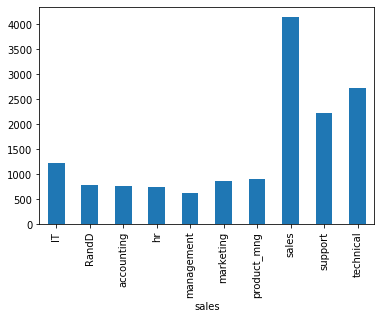

In [21]:
employees_count_df.plot(kind="bar")

### Показать распределение сотрудников по зарплатам.


In [22]:
employee_salaryLvl_df = df.groupby("salary").count().iloc[:,0]
employee_salaryLvl_df.sort_values(by=["low","medium","high"],axis=1)  #.loc[:,["low","medium","high"]]

TypeError: sort_values() got an unexpected keyword argument 'by'

In [ ]:
employee_salaryLvl_df.plot(kind="bar")

### Показать распределение сотрудников по зарплатам совместно с департаментами.

### Сколько сотрудников покинули компанию.

### Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.